In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import joblib
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

from time import time
%matplotlib inline
import os
from sklearn import tree
import pydotplus 
from IPython.display import Image



import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)
games= pd.read_csv('games.csv')
rankings = pd.read_csv('ranking.csv')
players= pd.read_csv('players.csv')
teams= pd.read_csv('teams.csv')


/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 


In [2]:
data.isnull().sum()


GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [3]:
 games.isnull().sum()
# rankings.isnull().sum()
# players.isnull().sum()
# teams.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [4]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


In [5]:
# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = games[ games['FG_PCT_away'].isnull() ].index
# Delete these row indexes from dataFrame
games.drop(indexNames , inplace=True)
games.head(30)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
5,2021-11-17,22100218,Final,1610612752,1610612753,2021,1610612752,98.0,0.420,0.667,...,25.0,45.0,1610612753,104.0,0.406,0.833,0.289,20.0,51.0,0
6,2021-11-17,22100219,Final,1610612749,1610612747,2021,1610612749,109.0,0.460,0.708,...,22.0,52.0,1610612747,102.0,0.417,0.833,0.279,24.0,48.0,1
7,2021-11-17,22100220,Final,1610612750,1610612758,2021,1610612750,107.0,0.500,0.833,...,20.0,35.0,1610612758,97.0,0.366,0.760,0.263,19.0,47.0,1
8,2021-11-17,22100221,Final,1610612760,1610612745,2021,1610612760,101.0,0.446,0.563,...,18.0,56.0,1610612745,89.0,0.356,0.684,0.286,16.0,46.0,1
9,2021-11-17,22100222,Final,1610612756,1610612742,2021,1610612756,105.0,0.441,0.714,...,27.0,49.0,1610612742,98.0,0.413,1.000,0.500,28.0,50.0,1


In [6]:
games.isnull().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [7]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

### creating files for each task

In [8]:
cleaned_data= data
cleaned_data.to_csv('cleanedGD.csv', index=False)
tsk1=pd.read_csv('cleanedGD.csv')
tsk2=pd.read_csv('cleanedGD.csv')
tsk3=pd.read_csv('cleanedGD.csv')
tsk4=pd.read_csv('cleanedGD.csv')
tsk5=pd.read_csv('cleanedGD.csv')

cleaned_games= games
cleaned_games.to_csv('cleanedGDgames.csv', index=False)
tsk1games= pd.read_csv('cleanedGDgames.csv')


##### task 1 

In [9]:
tsk1.drop(['GAME_ID'], axis=1, inplace=True)
tsk1.drop(['TEAM_ID'], axis=1, inplace=True)
tsk1.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk1.drop(['MIN'], axis=1, inplace=True)
tsk1.drop(['FGM'], axis=1, inplace=True)
tsk1.drop(['FGA'], axis=1, inplace=True)
tsk1.drop(['FG3M'], axis=1, inplace=True)
tsk1.drop(['FG3A'], axis=1, inplace=True)
tsk1.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk1.drop(['DREB'], axis=1, inplace=True)
tsk1.drop(['OREB'], axis=1, inplace=True)
tsk1.drop(['FTM'], axis=1, inplace=True)
tsk1.drop(['FTA'], axis=1, inplace=True)
tsk1.drop(['TO'], axis=1, inplace=True)
tsk1.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
tsk1.drop(['FG_PCT'], axis=1, inplace=True)
tsk1.drop(['FG3_PCT'], axis=1, inplace=True)
tsk1.drop(['FT_PCT'], axis=1, inplace=True)
tsk1.drop(['PF'], axis=1, inplace=True)
tsk1.drop(['BLK'], axis=1, inplace=True)
tsk1.head()
task_1= tsk1
task_1.to_csv('216359770-215614720-216846396-T1.csv', index=False)
t1 = pd.read_csv('216359770-215614720-216846396-T1.csv')

#### games

In [10]:
tsk1games.drop(['GAME_DATE_EST'], axis=1, inplace=True)
tsk1games.drop(['GAME_ID'], axis=1, inplace=True)
tsk1games.drop(['GAME_STATUS_TEXT'], axis=1, inplace=True)
tsk1games.drop(['HOME_TEAM_ID'], axis=1, inplace=True)
tsk1games.drop(['VISITOR_TEAM_ID'], axis=1, inplace=True)
tsk1games.drop(['SEASON'], axis=1, inplace=True)
tsk1games.drop(['TEAM_ID_home'], axis=1, inplace=True)
# tsk1games.drop(['PTS_home'], axis=1, inplace=True)
# tsk1games.drop(['FG_PCT_home'], axis=1, inplace=True)
# tsk1games.drop(['FT_PCT_home'], axis=1, inplace=True)
# tsk1games.drop(['FG3_PCT_home'], axis=1, inplace=True)
tsk1games.drop(['AST_home'], axis=1, inplace=True)
tsk1games.drop(['REB_home'], axis=1, inplace=True)
tsk1games.drop(['TEAM_ID_away'], axis=1, inplace=True)
tsk1games.drop(['PTS_away'], axis=1, inplace=True)
tsk1games.drop(['FG_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['FT_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['FG3_PCT_away'], axis=1, inplace=True)
tsk1games.drop(['AST_away'], axis=1, inplace=True)
tsk1games.drop(['REB_away'], axis=1, inplace=True)
task_1_games= tsk1games
task_1_games.to_csv('216359770-215614720-216846396-T1_games.csv', index=False)
t1_games = pd.read_csv('216359770-215614720-216846396-T1_games.csv')

##### Task 5 Similarity Measurement select any 5 numeric dimensions and leave the additional.
##### Submit your filtered data, the data for the selected dimensions.

In [11]:
task_5_games= tsk1games
task_5_games.to_csv('216359770-215614720-216846396-T5_games.csv', index=False)
t5_games = pd.read_csv('216359770-215614720-216846396-T5_games.csv')

#### rankings

In [12]:
# rankings.drop(['TEAM_ID'], axis=1, inplace=True)
rankings.drop(['LEAGUE_ID'], axis=1, inplace=True)
rankings.drop(['G'], axis=1, inplace=True)
rankings.drop(['STANDINGSDATE'], axis=1, inplace=True)
rankings.drop(['CONFERENCE'], axis=1, inplace=True)
rankings.drop(['TEAM_ID'], axis=1, inplace=True)
rankings.drop(['HOME_RECORD'], axis=1, inplace=True)
rankings.drop(['ROAD_RECORD'], axis=1, inplace=True)
rankings.drop(['RETURNTOPLAY'], axis=1, inplace=True)
task_1_rankings= rankings
task_1_rankings.to_csv('216359770-215614720-216846396-T1_rankings.csv', index=False)
t1_rankings = pd.read_csv('216359770-215614720-216846396-T1_rankings.csv')
t1_rankings.head()

,SEASON_ID,TEAM,W,L,W_PCT
0,22021,Golden State,12,2,0.857
1,22021,Phoenix,11,3,0.786
2,22021,Dallas,9,5,0.643
3,22021,Denver,9,5,0.643
4,22021,LA Clippers,9,5,0.643


##### Task 2: Basic Statistical Analysis: From your data set, select one dimension of each kind: Nominal, Ordinal, Interval, Ratio.

In [13]:
tsk2.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk2['START_POSITION'] = tsk2['START_POSITION'].map(START_POSITION_num)
tsk2['START_POSITION'] = tsk2['START_POSITION'].replace(np.nan, 4)
tsk2['PLUS_MINUS'].fillna(tsk2['PLUS_MINUS'].mean(), inplace=True)
tsk2.isnull().sum()
tsk2.drop(['GAME_ID'], axis=1, inplace=True)
tsk2.drop(['TEAM_ID'], axis=1, inplace=True)
# tsk1.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk2.drop(['MIN'], axis=1, inplace=True)
tsk2.drop(['FGM'], axis=1, inplace=True)
tsk2.drop(['FGA'], axis=1, inplace=True)
tsk2.drop(['FG3M'], axis=1, inplace=True)
tsk2.drop(['FG3A'], axis=1, inplace=True)
tsk2.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk2.drop(['DREB'], axis=1, inplace=True)
tsk2.drop(['OREB'], axis=1, inplace=True)
tsk2.drop(['FTM'], axis=1, inplace=True)
tsk2.drop(['FTA'], axis=1, inplace=True)
tsk2.drop(['TO'], axis=1, inplace=True)
tsk2.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk2.drop(['FG3_PCT'], axis=1, inplace=True)
tsk2.drop(['FT_PCT'], axis=1, inplace=True)
tsk2.drop(['PF'], axis=1, inplace=True)
tsk2.drop(['BLK'], axis=1, inplace=True)
tsk2.drop(['REB'], axis=1, inplace=True)
tsk2.drop(['STL'], axis=1, inplace=True)
tsk2.drop(['AST'], axis=1, inplace=True)
task_2= tsk2
task_2.to_csv('216359770-215614720-216846396-T2.csv', index=False)
t2 = pd.read_csv('216359770-215614720-216846396-T2.csv')
t2.head()

,PLAYER_ID,START_POSITION,FG_PCT,PTS
0,203484,1.0,0.167,3.0
1,1628398,1.0,0.167,5.0
2,1629655,2.0,0.750,20.0
3,203078,3.0,0.450,24.0
4,203915,3.0,0.000,0.0


##### Task 3: Standardization and Normalization: Select two dimensions, one Interval and one Ratio; dimensions from Task2 may be reused.

In [14]:
tsk3.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk3['START_POSITION'] = tsk3['START_POSITION'].map(START_POSITION_num)
tsk3['START_POSITION'] = tsk3['START_POSITION'].replace(np.nan, 4)
tsk3['PLUS_MINUS'].fillna(tsk3['PLUS_MINUS'].mean(), inplace=True)
tsk3.isnull().sum()
tsk3.drop(['GAME_ID'], axis=1, inplace=True)
tsk3.drop(['TEAM_ID'], axis=1, inplace=True)
tsk3.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk3.drop(['MIN'], axis=1, inplace=True)
tsk3.drop(['FGM'], axis=1, inplace=True)
tsk3.drop(['FGA'], axis=1, inplace=True)
tsk3.drop(['FG3M'], axis=1, inplace=True)
tsk3.drop(['FG3A'], axis=1, inplace=True)
tsk3.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk3.drop(['DREB'], axis=1, inplace=True)
tsk3.drop(['OREB'], axis=1, inplace=True)
tsk3.drop(['FTM'], axis=1, inplace=True)
tsk3.drop(['FTA'], axis=1, inplace=True)
tsk3.drop(['TO'], axis=1, inplace=True)
tsk3.drop(['PLAYER_NAME'], axis=1, inplace=True)
tsk3.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk3.drop(['FG3_PCT'], axis=1, inplace=True)
tsk3.drop(['FT_PCT'], axis=1, inplace=True)
tsk3.drop(['PF'], axis=1, inplace=True)
tsk3.drop(['BLK'], axis=1, inplace=True)
tsk3.drop(['REB'], axis=1, inplace=True)
tsk3.drop(['STL'], axis=1, inplace=True)
tsk3.drop(['AST'], axis=1, inplace=True)
task_3= tsk3
task_3.to_csv('216359770-215614720-216846396-T3.csv', index=False)
t3 = pd.read_csv('216359770-215614720-216846396-T3.csv')
t3.head()

,FG_PCT,PTS
0,0.167,3.0
1,0.167,5.0
2,0.750,20.0
3,0.450,24.0
4,0.000,0.0


#####  Task 4 Principal Component Analysis preprocessing: convert name attributes into numerical and remove rest NaN and delete extra dimensions


In [15]:
tsk4.head()
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk4['START_POSITION'] = tsk4['START_POSITION'].map(START_POSITION_num)
tsk4['START_POSITION'] = tsk4['START_POSITION'].replace(np.nan, 4)
tsk4['PLUS_MINUS'].fillna(tsk4['PLUS_MINUS'].mean(), inplace=True)
tsk4.isnull().sum()
tsk4.drop(['GAME_ID'], axis=1, inplace=True)
tsk4.drop(['TEAM_ID'], axis=1, inplace=True)
tsk4.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk4.drop(['MIN'], axis=1, inplace=True)
tsk4.drop(['FGM'], axis=1, inplace=True)
tsk4.drop(['FGA'], axis=1, inplace=True)
tsk4.drop(['FG3M'], axis=1, inplace=True)
tsk4.drop(['FG3A'], axis=1, inplace=True)
tsk4.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk4.drop(['DREB'], axis=1, inplace=True)
tsk4.drop(['OREB'], axis=1, inplace=True)
tsk4.drop(['FTM'], axis=1, inplace=True)
tsk4.drop(['FTA'], axis=1, inplace=True)
tsk4.drop(['TO'], axis=1, inplace=True)
tsk4.drop(['PLAYER_NAME'], axis=1, inplace=True)
# t1.drop(['START_POSITION'], axis=1, inplace=True)
# t1.drop(['FG_PCT'], axis=1, inplace=True)
# t1.drop(['FG3_PCT'], axis=1, inplace=True)
# t1.drop(['FT_PCT'], axis=1, inplace=True)
# t1.drop(['PF'], axis=1, inplace=True)


task_4= tsk4
task_4.to_csv('216359770-215614720-216846396-T4.csv', index=False)
t4 = pd.read_csv('216359770-215614720-216846396-T4.csv')
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


## Task 1 Describing the Data

### games details dataset

In [16]:
t1.head()

,START_POSITION,REB,AST,STL,PTS
0,F,6.0,2.0,1.0,3.0
1,F,5.0,3.0,1.0,5.0
2,C,9.0,1.0,2.0,20.0
3,G,3.0,7.0,2.0,24.0
4,G,3.0,2.0,0.0,0.0


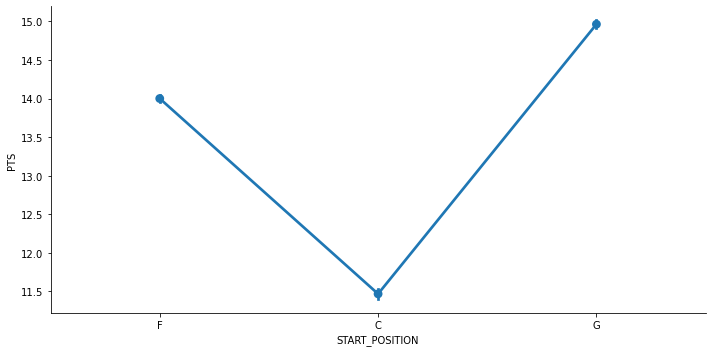

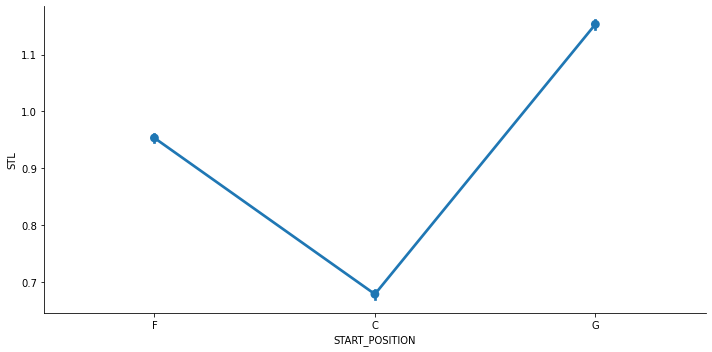

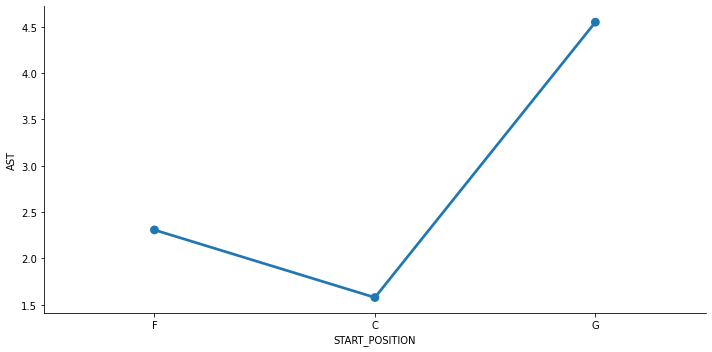

<Figure size 432x288 with 0 Axes>

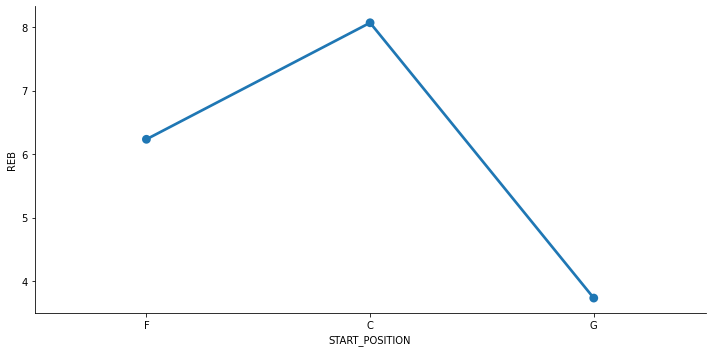

In [17]:
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='PTS', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='STL', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='AST', data=t1, kind='point', aspect=2, )
for i, col in enumerate(['START_POSITION']):
    plt.figure(i)
    sb.catplot(x=col, y='REB', data=t1, kind='point', aspect=2, )


##### When comparing the average points (PTS) of each starting position it is prevalent that guards make the most points followed by forwards and finally centers. In terms of steals (STL) and assists (AST), it is the same order with guards having the most steals followed by forwards and lastly centers. When looking at rebounds it is no surprise that centers have the most as they are the closest to the net. 

### games dataset

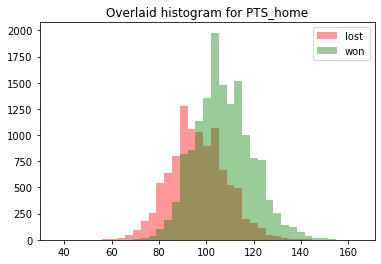

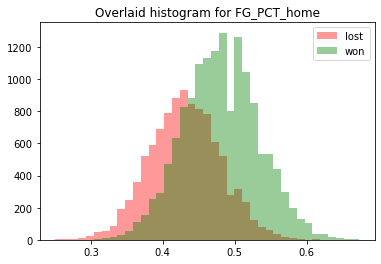

In [18]:
for i in ['PTS_home', 'FG_PCT_home']:
    lost = list(t1_games[t1_games['HOME_TEAM_WINS'] == 0][i].dropna())
    won = list(t1_games[t1_games['HOME_TEAM_WINS'] == 1][i].dropna())
    xmin = min(min(lost), min(won))
    xmax = max(max(lost), max(won))
    width = (xmax - xmin) / 40
    sb.distplot(lost, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sb.distplot(won, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['lost', 'won'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

#### here we have an overlaid histogram showing the games won and lost with the number of points a team got, with this analysis we can observe that total points were around 100 per game and appear to be close calls. however, looking at the field goal percentage we can observe that the winning teams scored a higher percentage which is inevitable. 

### rankings dataset

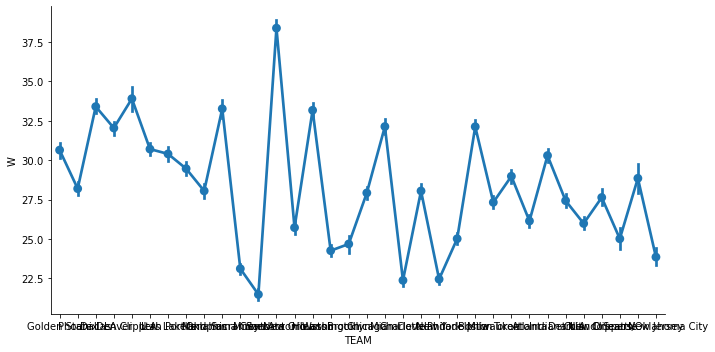

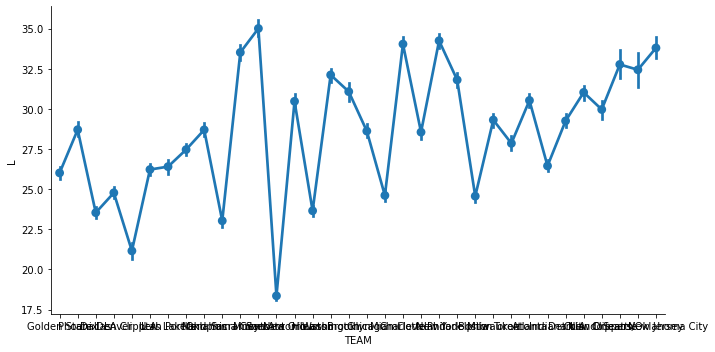

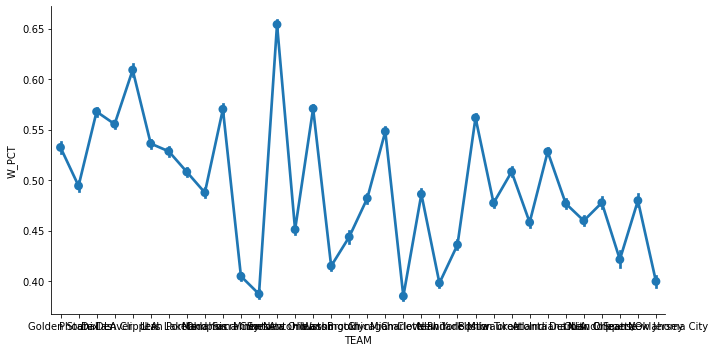

<Figure size 432x288 with 0 Axes>

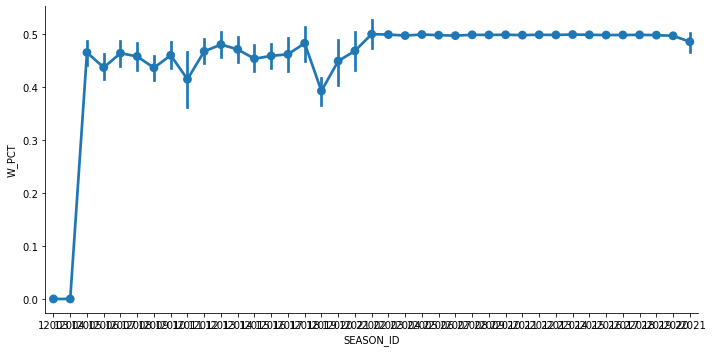

In [19]:
for i, col in enumerate(['TEAM']):
    plt.figure(i)
    sb.catplot(x=col, y='W', data=t1_rankings, kind='point', aspect=2, )
for i, col in enumerate(['TEAM']):
    plt.figure(i)
    sb.catplot(x=col, y='L', data=t1_rankings, kind='point', aspect=2, )
for i, col in enumerate(['TEAM']):
    plt.figure(i)
    sb.catplot(x=col, y='W_PCT', data=t1_rankings, kind='point', aspect=2, )
for i, col in enumerate(['SEASON_ID']):
    plt.figure(i)
    sb.catplot(x=col, y='W_PCT', data=t1_rankings, kind='point', aspect=2, )


### players dataset

### teams dataset

# analysis needed for task 1 ^

## task 2 perform two basic statistical operations/tests and o describe the results using a suitable technique o describe any data preprocessing that you have performed

In [20]:
t2.describe()

,PLAYER_ID,START_POSITION,FG_PCT,PTS
count,5.237510e+05,523751.000000,523751.000000,523751.000000
mean,3.315081e+05,3.085936,0.415843,9.640753
std,7.689801e+06,1.165440,0.251636,8.039700
min,1.500000e+01,1.000000,0.000000,0.000000
25%,2.412000e+03,2.000000,0.250000,3.000000
50%,2.008260e+05,4.000000,0.429000,8.000000
75%,2.030810e+05,4.000000,0.571000,14.000000
max,1.962938e+09,4.000000,1.000000,81.000000


**Observation1:** There are no missing values in the data set after cleaning the data

**Observation2:** Our target variable START_POSITION is catigorical

**Observation3:** FG_PCT have limited range of values



In [21]:
median= np.median(t2['PTS'])
median


8.0

## Task 3 analysis

In [22]:
t3.describe()

,FG_PCT,PTS
count,523751.000000,523751.000000
mean,0.415843,9.640753
std,0.251636,8.039700
min,0.000000,0.000000
25%,0.250000,3.000000
50%,0.429000,8.000000
75%,0.571000,14.000000
max,1.000000,81.000000


### min-max normalization graph

True


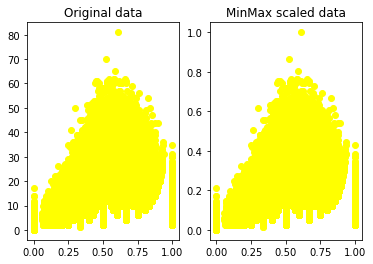

In [23]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# use the iris dataset
X= t3
y= t3
X.shape
# (523751, 2) # 523751 samples (rows) with 2 features/variables (columns)
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True
fig, axes = plt.subplots(1,2)
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c="yellow")
axes[0].set_title("Original data")
axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c="yellow")
axes[1].set_title("MinMax scaled data")
plt.show()


#### with this min-max normalization, we can see there is no significant difference between the original and the min-max normalization. This is due to the data already having a similar scall. 

##### The MinMax scaling effect on the first 2 features of the games_detail dataset.


In [24]:
t3['FG_PCT zscore'] = stats.zscore(t3['FG_PCT'])
t3['PTS zscore'] = stats.zscore(t3['PTS'])
print(t3.head())

   FG_PCT   PTS  FG_PCT zscore  PTS zscore
0   0.167   3.0      -0.988903   -0.825996
1   0.167   5.0      -0.988903   -0.577230
2   0.750  20.0       1.327941    1.288513
3   0.450  24.0       0.135740    1.786044
4   0.000   0.0      -1.652562   -1.199145


In [25]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(t3)
scaled1[:5]
pd.DataFrame(t3).describe().head(3)


,FG_PCT,PTS,FG_PCT zscore,PTS zscore
count,523751.000000,523751.000000,5.237510e+05,5.237510e+05
mean,0.415843,9.640753,8.209032e-16,1.316177e-14
std,0.251636,8.039700,1.000001e+00,1.000001e+00


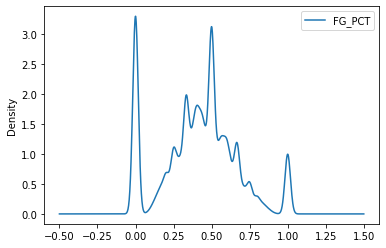

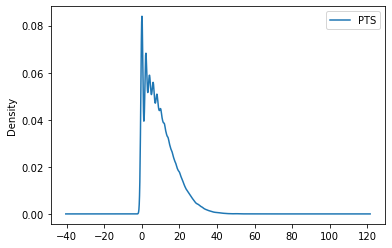

In [26]:
pd.DataFrame(t3["FG_PCT"]).plot(kind='kde');
pd.DataFrame(t3["PTS"]).plot(kind='kde');

#### Looking at the z-score for both components we can see that majority of the points were between 0-20, with an average shooting percentage of .50

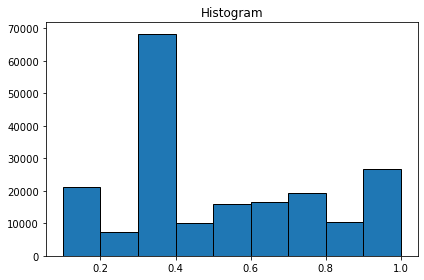

In [27]:
bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
plt.hist(t3["FG_PCT zscore"], bins=bins, edgecolor='black', log= False)

plt.title("Histogram") 

plt.tight_layout()
plt.show()

## Task 4 Principal Component Analysis

# PCA Analysis

In [28]:
t4.head()

,START_POSITION,FG_PCT,FG3_PCT,FT_PCT,REB,AST,STL,BLK,PF,PTS
0,1.0,0.167,0.000,1.0,6.0,2.0,1.0,0.0,0.0,3.0
1,1.0,0.167,0.125,0.0,5.0,3.0,1.0,2.0,1.0,5.0
2,2.0,0.750,0.000,0.4,9.0,1.0,2.0,1.0,4.0,20.0
3,3.0,0.450,0.455,1.0,3.0,7.0,2.0,0.0,3.0,24.0
4,3.0,0.000,0.000,0.0,3.0,2.0,0.0,0.0,1.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
scalar_data=t4
scaler = StandardScaler()
scaler.fit(scalar_data)
scaled_data = scaler.transform(scalar_data)
from sklearn.decomposition import PCA
# scalar_data

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [30]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(523751, 10)

In [31]:
x_pca.shape

(523751, 2)

Text(0, 0.5, 'Second Principal Component')

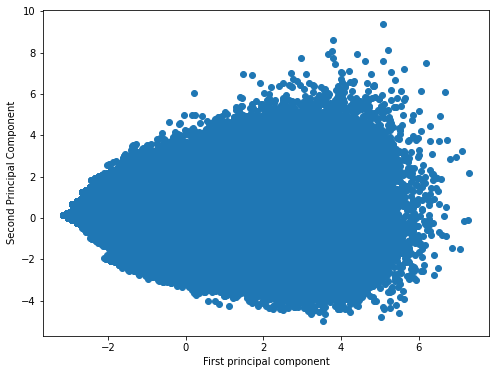

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [33]:
df_comp = pd.DataFrame(pca.components_,columns=scalar_data.columns)

<AxesSubplot:>

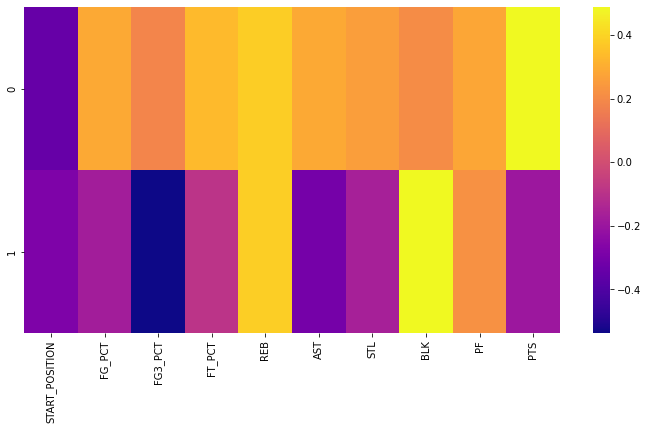

In [34]:
plt.figure(figsize=(12,6))
sb.heatmap(df_comp,cmap='plasma',)

### Task 5: Similarity Measurement
#### From your data set select the object type with most numeric dimensions. For this task we will use only numeric dimensions of that object type; so, ignore the other dimensions. If the number of numeric dimensions is more than 5 in this object type, then you many select any 5 numeric dimensions and leave the additional
##### dropping all non numeric entities, and additional numberic entities

##### Submit your filtered data, the data for the selected dimensions, in the form of a CSV file: name it as 100131001-100131002—T5Data.csv

## Hierarchial clustering

In [35]:
t5_games.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,HOME_TEAM_WINS
0,97.0,0.438,0.500,0.313,1
1,97.0,0.425,0.750,0.286,1
2,110.0,0.506,0.833,0.351,1
3,109.0,0.458,0.840,0.375,1
4,113.0,0.483,0.824,0.375,1


In [36]:
df = t5_games.sample(n=10)

In [37]:
df.head(10)

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,HOME_TEAM_WINS
3652,109.0,0.550,0.607,0.250,1
10524,100.0,0.463,0.750,0.353,1
22238,104.0,0.414,0.815,0.294,1
18979,124.0,0.568,0.875,0.440,1
533,113.0,0.462,0.895,0.444,1
10707,97.0,0.478,0.879,0.222,1
15490,105.0,0.451,0.875,0.417,0
22129,104.0,0.446,0.714,0.484,1
5783,92.0,0.443,0.609,0.444,0
19347,108.0,0.463,0.750,0.440,1


In [38]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(df,df)

array([[0.00000000e+00, 9.00214569e+00, 5.00636555e+00, 1.50036078e+01,
        4.01600847e+00, 1.20033309e+01, 4.13636483e+00, 5.00769618e+00,
        1.70308276e+01, 1.03156095e+00],
       [9.00214569e+00, 0.00000000e+00, 4.00126318e+00, 2.40007129e+01,
        1.30011271e+01, 3.00566582e+00, 5.10096707e+00, 4.00234256e+00,
        8.06402889e+00, 8.00047305e+00],
       [5.00636555e+00, 4.00126318e+00, 0.00000000e+00, 2.00012158e+01,
        9.00173339e+00, 7.00095536e+00, 1.42130152e+00, 2.17543099e-01,
        1.20443255e+01, 4.00349123e+00],
       [1.50036078e+01, 2.40007129e+01, 2.00012158e+01, 0.00000000e+00,
        1.10005296e+01, 2.70010304e+01, 1.90266712e+01, 2.00010685e+01,
        3.20169705e+01, 1.60008328e+01],
       [4.01600847e+00, 1.30011271e+01, 9.00173339e+00, 1.10005296e+01,
        0.00000000e+00, 1.60015560e+01, 8.06233527e+00, 9.00192296e+00,
        2.10257499e+01, 5.00210376e+00],
       [1.20033309e+01, 3.00566582e+00, 7.00095536e+00, 2.70010304e+01,
   

#### this is finding the Euclidiean distances between each row with each row and each of their corresponding dimensions 

In [39]:
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [40]:

cars = pd.read_csv("216359770-215614720-216846396-T5_games.csv")
cars.columns = ['PTS_home','FG_PCT_home','FT_PCT_home','FG3_PCT_home', 'HOME_TEAM_WINS']

X = cars[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'HOME_TEAM_WINS']].values

y = cars.iloc[:,(4)].values

In [41]:
Z = linkage(X, 'ward')

In [42]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.5596389167502508

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(df,df)


array([[1.        , 0.99999694, 0.99999662, 0.99999738, 0.99999539,
        0.99999325, 0.99995241, 0.99999599, 0.99995414, 0.99999718],
       [0.99999694, 1.        , 0.99999941, 0.99999803, 0.99999902,
        0.99999792, 0.99994951, 0.99999904, 0.99994876, 0.99999936],
       [0.99999662, 0.99999941, 1.        , 0.99999805, 0.99999909,
        0.99999842, 0.99995295, 0.99999781, 0.99995069, 0.99999871],
       [0.99999738, 0.99999803, 0.99999805, 1.        , 0.99999913,
        0.99999462, 0.99996654, 0.99999813, 0.99996655, 0.9999991 ],
       [0.99999539, 0.99999902, 0.99999909, 0.99999913, 1.        ,
        0.99999659, 0.99996074, 0.99999887, 0.99995934, 0.99999941],
       [0.99999325, 0.99999792, 0.99999842, 0.99999462, 0.99999659,
        1.        , 0.99994499, 0.99999435, 0.99994066, 0.99999541],
       [0.99995241, 0.99994951, 0.99995295, 0.99996654, 0.99996074,
        0.99994499, 1.        , 0.99995247, 0.99999803, 0.99995617],
       [0.99999599, 0.99999904, 0.9999978

In [44]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)

Estimated covariance matrix:
MCD (Robust):
[[1.61034173e+02 4.70807736e-01 2.23960566e-01 6.01371451e-01
  2.57793304e+00]
 [4.70807736e-01 3.01219024e-03 1.26298847e-04 2.71177630e-03
  1.19856756e-02]
 [2.23960566e-01 1.26298847e-04 9.02646720e-03 4.02072817e-04
  4.27537754e-03]
 [6.01371451e-01 2.71177630e-03 4.02072817e-04 1.09065911e-02
  1.65974759e-02]
 [2.57793304e+00 1.19856756e-02 4.27537754e-03 1.65974759e-02
  2.41489080e-01]]
MLE:
[[1.72252753e+02 4.92514638e-01 2.41517491e-01 6.27746243e-01
  2.59130394e+00]
 [4.92514638e-01 3.21417016e-03 1.01237752e-04 2.86652244e-03
  1.20549202e-02]
 [2.41517491e-01 1.01237752e-04 1.01351443e-02 3.13559806e-04
  4.55068880e-03]
 [6.27746243e-01 2.86652244e-03 3.13559806e-04 1.27201011e-02
  1.65807075e-02]
 [2.59130394e+00 1.20549202e-02 4.55068880e-03 1.65807075e-02
  2.41680072e-01]]


## task 6 

### Preprocessing data - combine data from games.csv and games_details.csv
#### join on games.csv and games_details.csv. add the percentage of 2 point shots successfully made, to the games.csv table


In [45]:
details = pd.read_csv('games_details.csv')
# 'FG3_PCT','FG_PCT',
details=details[details.columns.drop(['TEAM_ABBREVIATION','TEAM_CITY','PLAYER_ID','PLAYER_NAME','NICKNAME','START_POSITION','COMMENT','MIN','PLUS_MINUS'])]
data = pd.read_csv('games.csv')
mean_hpts = data['PTS_home'].mean()
# get the null columns and store them in 'a'
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
a = data[data["REB_away"].isnull()][null_columns]
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
a = data[data["REB_away"].isnull()][null_columns]
a = data[data["REB_away"].isnull()]
# drops all rows with any null columns
data = data.dropna(axis=0,how='any')
data['HOME_TEAM_WINS'] = data['HOME_TEAM_WINS'].replace([1], 'HOME WIN')
data['HOME_TEAM_WINS'] = data['HOME_TEAM_WINS'].replace([0], 'HOME LOSS')
details = details.groupby(['GAME_ID','TEAM_ID']).sum()
details['FG_PCT'] = round(details['FGM']/details['FGA'],3)
details['FT_PCT'] = round(details['FTM']/details['FTA'],3)
details['FG3_PCT'] = round(details['FG3M']/details['FG3A'],3)
details=details.assign(FG2M=(details['FGM']-details['FG3M']))
details=details.assign(FG2A=(details['FGA']-details['FG3A']))
details=details.assign(FG2_PCT=(details['FG2M']/details['FG2A']))
details['FG2_PCT'] = round(details['FG2M']/details['FG2A'],3)
details
# 
# data_2018

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


FGM    FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                            
10300001 1610612742  34.0   76.0   0.447   2.0   8.0    0.250  15.0  30.0   
         1610612762  32.0   70.0   0.457   1.0   7.0    0.143  25.0  34.0   
10300002 1610612749  32.0   75.0   0.427   2.0  13.0    0.154  28.0  40.0   
         1610612763  40.0   81.0   0.494   4.0  15.0    0.267  21.0  34.0   
10300003 1610612739  38.0   77.0   0.494   4.0   6.0    0.667  20.0  29.0   
...                   ...    ...     ...   ...   ...      ...   ...   ...   
52000131 1610612763  40.0   90.0   0.444   7.0  22.0    0.318  13.0  24.0   
52000201 1610612754  41.0  100.0   0.410  15.0  41.0    0.366  18.0  21.0   
         1610612764  54.0   93.0   0.581  14.0  28.0    0.500  20.0  26.0   
52000211 1610612744  42.0   94.0   0.447  12.0  34.0    0.353  16.0  20.0   
         1610612763  40.0   98.0   0.408  15.0  35.0    0.429  22.0  26.0   

                     FT_PCT  OREB  ...   REB   AST   STL   BLK    TO    PF  \
GAME_ID  TEAM_ID                   ...                                       
10300001 1610612742   0.500  12.0  ...  38.0  20.0   9.0   4.0  18.0  34.0   
         1610612762   0.735   9.0  ...  41.0  23.0   8.0   4.0  18.0  26.0   
10300002 1610612749   0.700  11.0  ...  43.0  20.0   9.0   4.0  24.0  26.0   
         1610612763   0.618  14.0  ...  48.0  25.0  18.0   7.0  25.0  35.0   
10300003 1610612739   0.690  12.0  ...  52.0  25.0  10.0   7.0  25.0  33.0   
...                     ...   ...  ...   ...   ...   ...   ...   ...   ...   
52000131 1610612763   0.542  11.0  ...  56.0  18.0   4.0  11.0   9.0  19.0   
52000201 1610612754   0.857   9.0  ...  40.0  30.0   9.0   4.0  14.0  19.0   
         1610612764   0.769   7.0  ...  52.0  34.0   7.0   9.0  15.0  20.0   
52000211 1610612744   0.800  11.0  ...  48.0  30.0   7.0   7.0  21.0  23.0   
         1610612763   0.846  16.0  ...  47.0  22.0  14.0   6.0  13.0  23.0   

                       PTS  FG2M  FG2A  FG2_PCT  
GAME_ID  TEAM_ID                                 
10300001 1610612742   85.0  32.0  68.0    0.471  
         1610612762   90.0  31.0  63.0    0.492  
10300002 1610612749   94.0  30.0  62.0    0.484  
         1610612763  105.0  36.0  66.0    0.545  
10300003 1610612739  100.0  34.0  71.0    0.479  
...                    ...   ...   ...      ...  
52000131 1610612763  100.0  33.0  68.0    0.485  
52000201 1610612754  115.0  26.0  59.0    0.441  
         1610612764  142.0  40.0  65.0    0.615  
52000211 1610612744  112.0  30.0  60.0    0.500  
         1610612763  117.0  25.0  63.0    0.397  

[49763 rows x 21 columns]

#### use data from the Toronto Raptors 2017 season as a training set, and use it to predict the results of the Toronto Raptors 2018 season (test set)


In [46]:
h=100
data_2018 = data[data['SEASON'] == 2018]#.head(h)
data_2017 = data[data['SEASON'] == 2017]#.head(h)
data_2017=data_2017[data_2017['HOME_TEAM_ID']==1610612761]
data_2018=data_2018[data_2018['HOME_TEAM_ID']==1610612761]
drop_atts = ['GAME_DATE_EST','GAME_STATUS_TEXT','VISITOR_TEAM_ID','SEASON','TEAM_ID_home','TEAM_ID_away']
data_2018=data_2018[data_2018.columns.drop(drop_atts)]
data_2017=data_2017[data_2017.columns.drop(drop_atts)]
data_2017=data_2017.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
data_2018=data_2018.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
# details.set_index('GAME_ID').join(data_2017.set_index('GAME_ID'))
# details=details.assign(TEAM=(details['TEAM_ID']*1))
data_17=pd.merge(details, data_2017, on=["GAME_ID","TEAM_ID"])
data_18=pd.merge(details, data_2018, on=["GAME_ID","TEAM_ID"])
# details
# data_2017
# data_17
data_17=data_17[data_17.columns.drop(['TEAM_ID'])]
data_18=data_18[data_18.columns.drop(['TEAM_ID'])]

#### Set the X and Y values for the training set. Only keep the 3-point shooting percentage, 2-point shooting percentage, and free-point shooting percentage in the X-table to see which was most important for success.


In [47]:
# split into X and Y
Y_2017 = data_17['HOME_TEAM_WINS']
# 'FG3_PCT_home','FG3_PCT_away','FG_PCT_home','FG_PCT_away','PTS_home', 'PTS_away','AST_away','AST_home'
drop_cols=['FG_PCT','FG2A','FG2M','PTS','REB_home','AST_home','FG3_PCT_home','FT_PCT_home','FG_PCT_home','PTS_home','GAME_ID','BLK','TO','PF','STL','AST','REB','DREB','OREB','FGM','FGA','FG3M','FG3A','FTM','FTA','HOME_TEAM_WINS','FG3_PCT_away','FG_PCT_away', 'PTS_away','AST_away','FT_PCT_away','REB_away']
X_2017 = data_17[data_17.columns.drop(drop_cols)]
X_2017
# data_2018

,FG3_PCT,FT_PCT,FG2_PCT
0,0.256,0.800,0.794
1,0.351,0.840,0.667
2,0.448,0.929,0.481
3,0.295,0.838,0.644
4,0.208,0.630,0.571
5,0.520,0.750,0.554
6,0.381,0.696,0.518
7,0.346,0.909,0.673
8,0.256,0.714,0.588
9,0.438,0.727,0.576


#### show the resulting decision tree that splits on entropy with max_depth = 2, to find the most important shooting percentage.


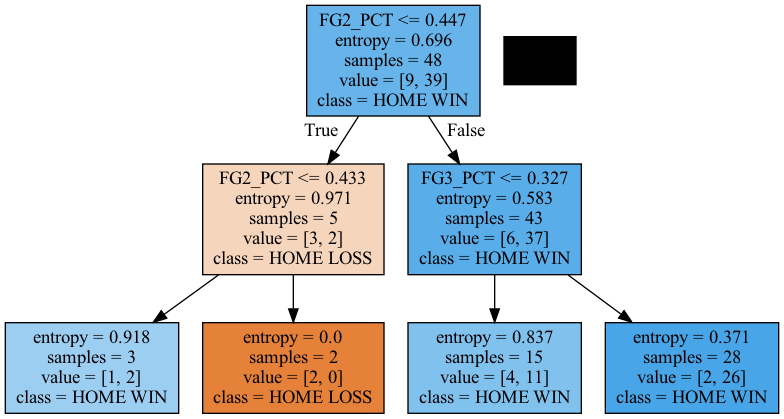

In [48]:
decTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
decTree = decTree.fit(X_2017,Y_2017)
dot_data = tree.export_graphviz(decTree, feature_names=X_2017.columns, class_names=['HOME LOSS','HOME WIN'], filled=True,
                               out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### Shows that shooting accurately with 2-pointers was the most important for Raptors success, followed by 3-point shooting accuracy.
##### Test the data on the 2018 data. Output -> [(number of correct predictions), (number of incorrect predictions)]


In [49]:
testX = data_18[data_18.columns.drop(drop_cols)]
testY = data_18["HOME_TEAM_WINS"]
predY = decTree.predict(testX)
testset = []
results = [0,0]
for row in testY:
    testset.append(row)
i=0
for row in predY:
    if testset[i] == row:
        results[0] += 1
    else:
        results[1] += 1
results
# testY

[55, 1]

#### Data was 95% accurate at predicting 2018 Toronto Raptors results based on shooting percentage statistics in each game.